In [39]:
import pickle

feature_bow = pickle.load(open("model/feature-bow.p",'rb'))
model_nb = pickle.load(open("model/model-nb.p", 'rb'))
model_nn = pickle.load(open("model/model-nn.p", 'rb'))

d:\python-app-web\praktikum\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2.post1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\python-app-web\praktikum\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.22.2.post1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\python-app-web\praktikum\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.2.post1 when usi

In [40]:
import pandas as pd

data = pd.read_csv("data/komeng_clean.csv")

In [41]:
def predict_sentiment(sent):
    # feature extraction
    text_feature = feature_bow.transform([sent])
    # predict
    return model_nb.predict(text_feature)[0]

In [42]:
data['sentiment'] = data.full_text.apply(predict_sentiment)
data

,full_text,sentiment
0,yang ketawa ngerti maksud komeng kah itu,negative
1,goblok sj kalau komeng di bagian pertanian su...,negative
2,sudah tepat pak komeng bicara demikian seharu...,positive
3,ketika sudah di bidang yang lain komeng sebelu...,neutral
4,gas terus bang komeng suara pendukung mu lebi...,positive
...,...,...
837,klo komeng mundur berarti pemerintah lebih la...,negative
838,secara tidak langsung komeng meng kritik peme...,negative
839,pertanyaan bang komeng emang cerdas mana ada ...,neutral
840,orang kerja di kantor itu harus ada ijazah pe...,neutral


In [43]:
data.to_csv('data/komeng_predicted.csv', index=False)

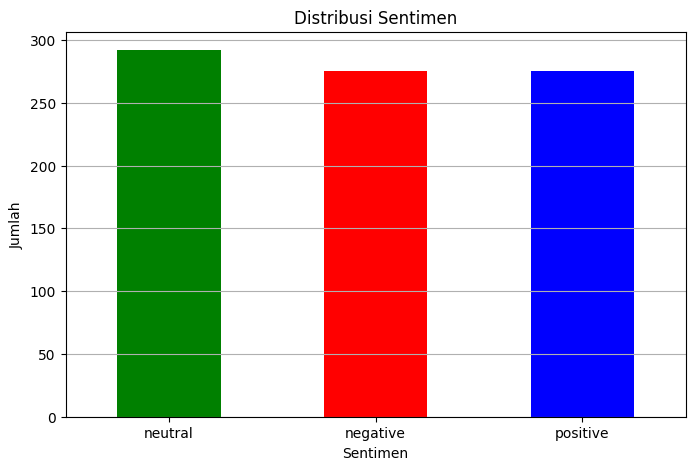

sentiment
neutral     292
negative    275
positive    275
Name: count, dtype: int64


In [44]:
import matplotlib.pyplot as plt


sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print(sentiment_counts)

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

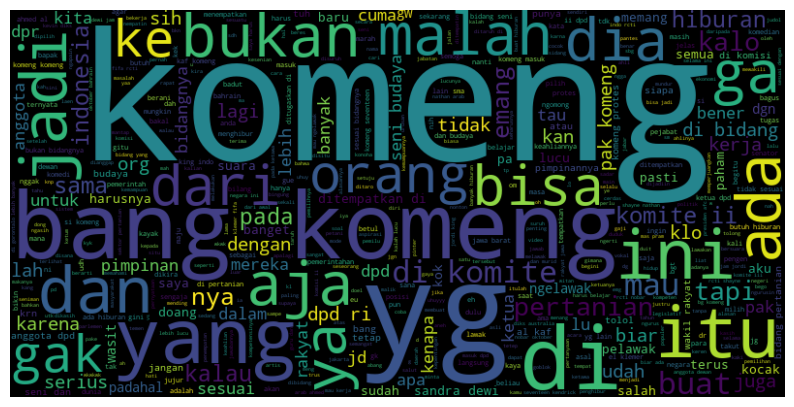

In [54]:
# 1. Word Cloud
# Gabungkan teks dari kolom 'full_text'
data_text = ' '.join(data['full_text'].astype(str).tolist())

# Generate WordCloud
wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400).generate(data_text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Sembunyikan axis
plt.show()


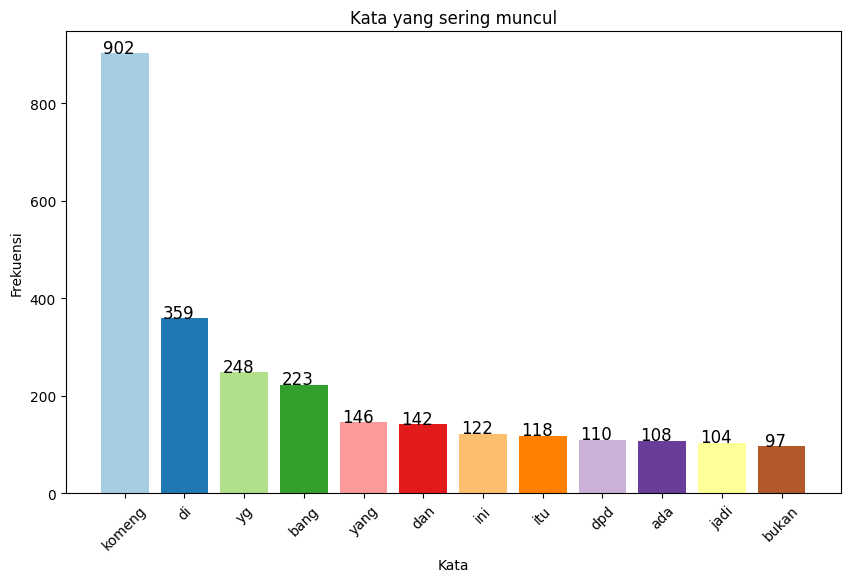

In [55]:
# 2. Bar Chart Kata yang Paling Sering Muncul
# Gabungkan semua teks dari kolom 'full_text'
text = ' '.join(data['full_text'].astype(str).tolist())
words = text.split()

# Hitung frekuensi kata
word_counts = Counter(words)

# Ambil 12 kata yang paling sering muncul
top_words = word_counts.most_common(12)

words, counts = zip(*top_words)

# Buat bar chart menggunakan matplotlib
colors = plt.cm.Paired(range(len(words)))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(words, counts, color=colors)

ax.set_xlabel('Kata')
ax.set_ylabel('Frekuensi')
ax.set_title('Kata yang sering muncul')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation=45)

# Tambahkan label frekuensi di atas setiap bar
for bar, num in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Tampilkan bar chart
plt.show()